In [1]:
#importing libraries
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

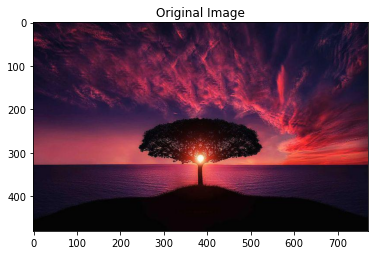

In [22]:
img_path = 'test.jpg'
img = cv.imread(img_path)
plt.title("Original Image")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.savefig('1.jpg')
plt.show()

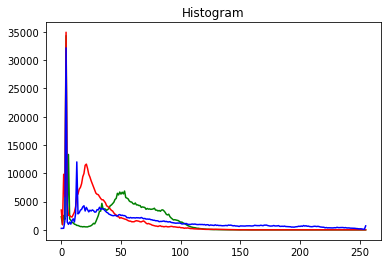

In [24]:
# ploting histogram 

colors = {'b','g','r'}
for i,color in enumerate(colors):
    hist = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color = color)
    plt.title('Histogram')
plt.savefig('2.jpg')
plt.show()

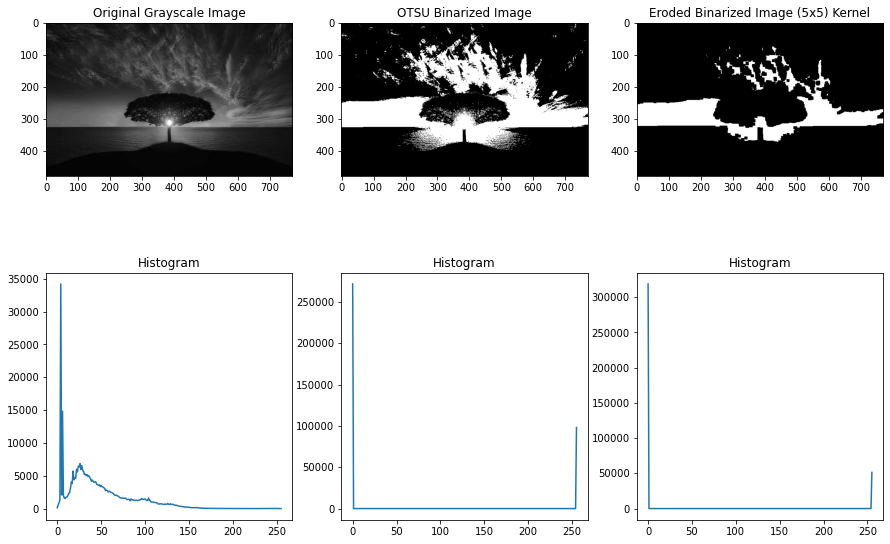

In [12]:
# Erosion
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
thresh,bin_img=cv.threshold(img_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

kernel=np.ones((5,5),np.float32)
eroded_img=cv.erode(bin_img,kernel,iterations=2)

hist_grayscale = cv.calcHist([img_gray], [0], None, [256], [0,256])
hist_otsu = cv.calcHist([bin_img], [0], None, [256], [0,256])
hist_eroded = cv.calcHist([eroded_img], [0], None, [256], [0,256])

row,col=2,3
fig=plt.figure(figsize=(15,10))
gs=GridSpec(row,col)

fig.add_subplot(gs[0,0])
plt.title('Original Grayscale Image')
plt.imshow(img_gray,cmap='gray')

fig.add_subplot(gs[0,1])
plt.title('OTSU Binarized Image')
plt.imshow(bin_img,cmap='gray')

fig.add_subplot(gs[0,2])
plt.title('Eroded Binarized Image (5x5) Kernel')
plt.imshow(eroded_img,cmap='gray')

fig.add_subplot(gs[1,0])
plt.title('Histogram')
plt.plot(hist_grayscale)

fig.add_subplot(gs[1,1])
plt.title('Histogram')
plt.plot(hist_otsu)

fig.add_subplot(gs[1,2])
plt.title('Histogram')
plt.plot(hist_eroded)
plt.savefig('3.jpg')

plt.show()

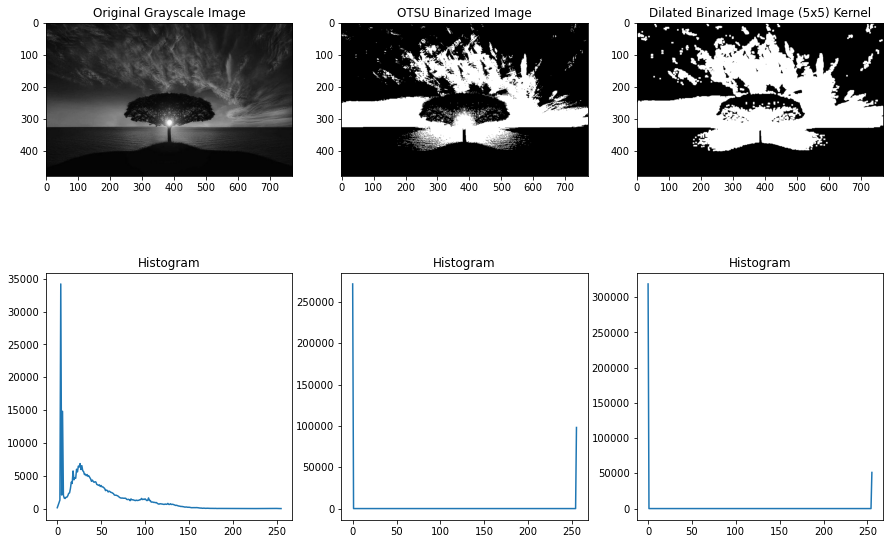

In [19]:
# Dilation
dilated_img=cv.dilate(bin_img,kernel,iterations=1)
hist_dilated = cv.calcHist([dilated_img], [0], None, [256], [0,256])

row,col=2,3
fig=plt.figure(figsize=(15,10))
gs=GridSpec(row,col)
fig.add_subplot(gs[0,0])
plt.title('Original Grayscale Image')
plt.imshow(img_gray,cmap='gray')

fig.add_subplot(gs[0,1])
plt.title('OTSU Binarized Image')
plt.imshow(bin_img,cmap='gray')

fig.add_subplot(gs[0,2])
plt.title('Dilated Binarized Image (5x5) Kernel')
plt.imshow(dilated_img,cmap='gray')

fig.add_subplot(gs[1,0])
plt.title('Histogram')
plt.plot(hist_grayscale)

fig.add_subplot(gs[1,1])
plt.title('Histogram')
plt.plot(hist_otsu)

fig.add_subplot(gs[1,2])
plt.title('Histogram')
plt.plot(hist_eroded)
plt.savefig('4.jpg')
plt.show()

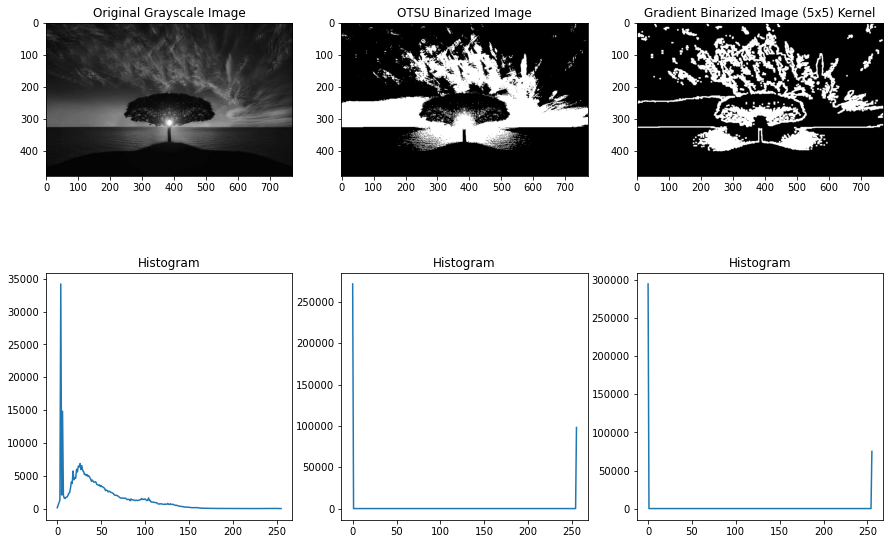

In [20]:
# Gradient
grad_img = cv.morphologyEx(bin_img, cv.MORPH_GRADIENT, kernel)
hist_gradient = cv.calcHist([grad_img], [0], None, [256], [0,256])

row,col=2,3
fig=plt.figure(figsize=(15,10))
gs=GridSpec(row,col)

fig.add_subplot(gs[0,0])
plt.title('Original Grayscale Image')
plt.imshow(img_gray,cmap='gray')

fig.add_subplot(gs[0,1])
plt.title('OTSU Binarized Image')
plt.imshow(bin_img,cmap='gray')

fig.add_subplot(gs[0,2])
plt.title('Gradient Binarized Image (5x5) Kernel')
plt.imshow(grad_img,cmap='gray')

fig.add_subplot(gs[1,0])
plt.title('Histogram')
plt.plot(hist_grayscale)

fig.add_subplot(gs[1,1])
plt.title('Histogram')
plt.plot(hist_otsu)

fig.add_subplot(gs[1,2])
plt.title('Histogram')
plt.plot(hist_gradient)

plt.savefig('5.jpg')